In [1]:
from sklearn.datasets import fetch_mldata
mnsit = fetch_mldata("MNIST original")

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
%matplotlib inline
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
X, y = mnsit["data"], mnsit["target"]

In [9]:
def pplot(num):
    some_digit = X[num]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    print("value", y[num])
    return some_digit

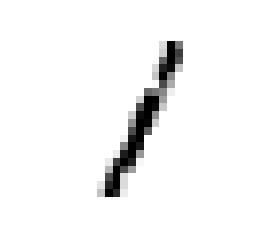

value 1.0


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  49, 253, 193,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
pplot(12345)

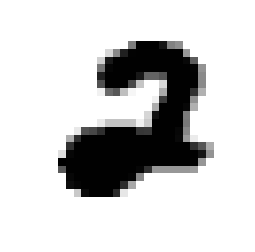

value 2.0


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 129, 254, 254, 255, 234,
       125, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  40, 118, 222, 252, 253, 253,
       253, 253, 253, 253, 102,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  48, 229, 253, 25

In [11]:
pplot(13254)

In [13]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance')

In [14]:
knn_clf.fit(X[60000:],y[60000:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')

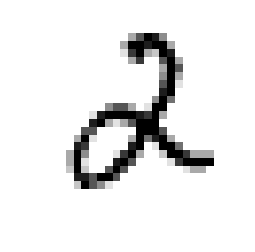

value 2.0


array([ 2.])

In [16]:
knn_clf.predict([pplot(15467)])

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(knn_clf, X[60000:], y[60000:], scoring="accuracy", cv=3, n_jobs=-1)

array([ 0.9182145 ,  0.94089409,  0.96034845])

In [19]:
import numpy as np

In [20]:
k = np.arange(20)+1

In [21]:
parameters = {'n_neighbors':k}

In [22]:
parameters

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])}

In [23]:
from sklearn.grid_search import GridSearchCV

In [24]:
clf = GridSearchCV(knn_clf, parameters, cv=10, n_jobs=-1)

In [25]:
clf.fit(X[60000:], y[60000:])

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
clf.best_score_

0.9518

In [27]:
clf.best_params_

{'n_neighbors': 4}

In [28]:
clf.score(X[60000:], y[60000:])

1.0

In [29]:
knn2_clf = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

In [30]:
knn2_clf.fit(X[60000:], y[60000:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [31]:
cross_val_score(knn2_clf, X[60000:], y[60000:], scoring="accuracy", cv=3, n_jobs=-1)

array([ 0.91222289,  0.93909391,  0.95464103])

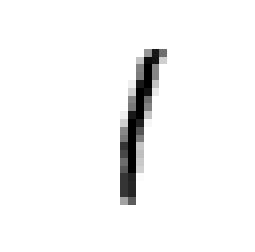

value 1.0


array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [32]:
knn2_clf.predict_proba([pplot(61235)])

In [ ]:
knn2_clf.predict_proba([pplot(62323)])